<a href="https://colab.research.google.com/github/MancheelaNithinkumar/FMML_Project_and_Labs/blob/main/M5L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


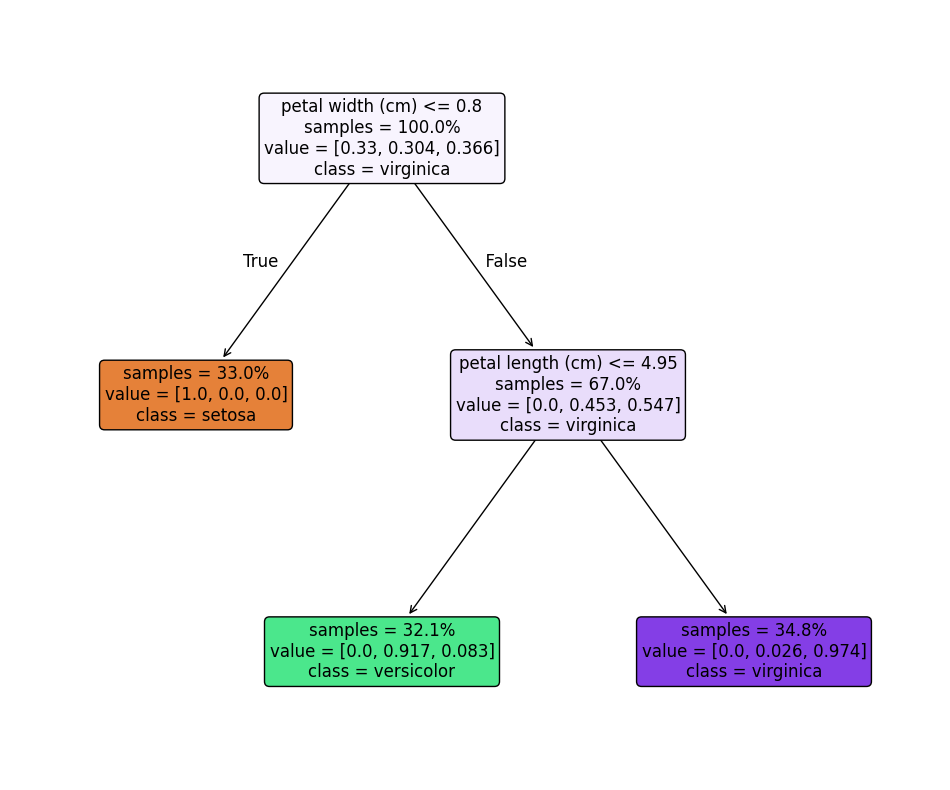

In [4]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [5]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


---

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


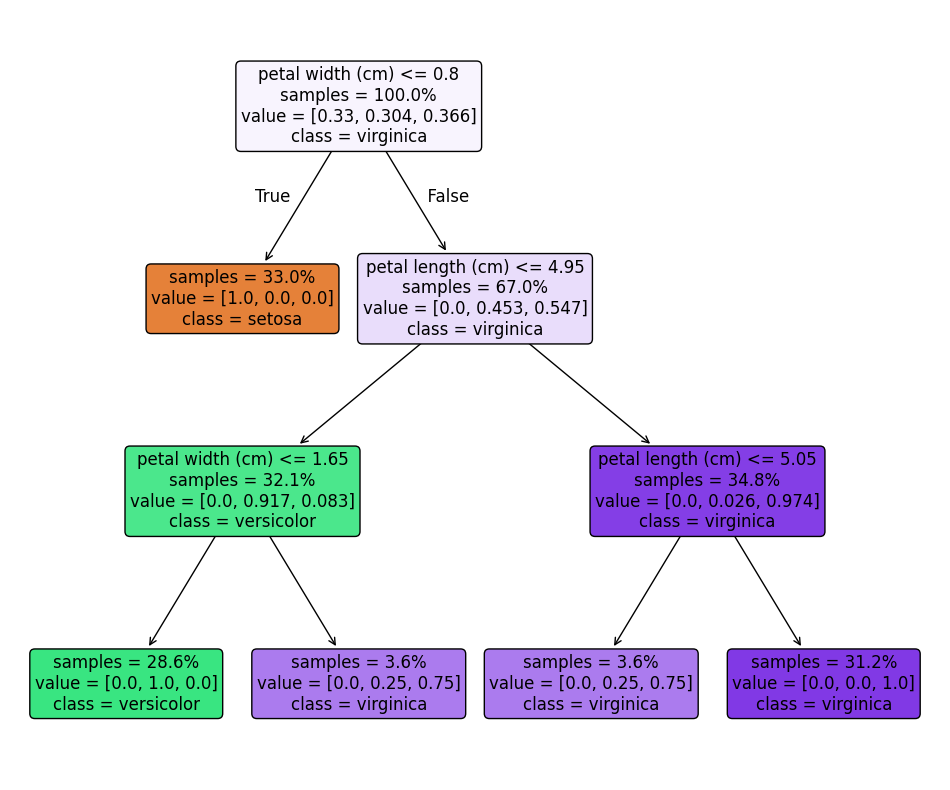

In [6]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

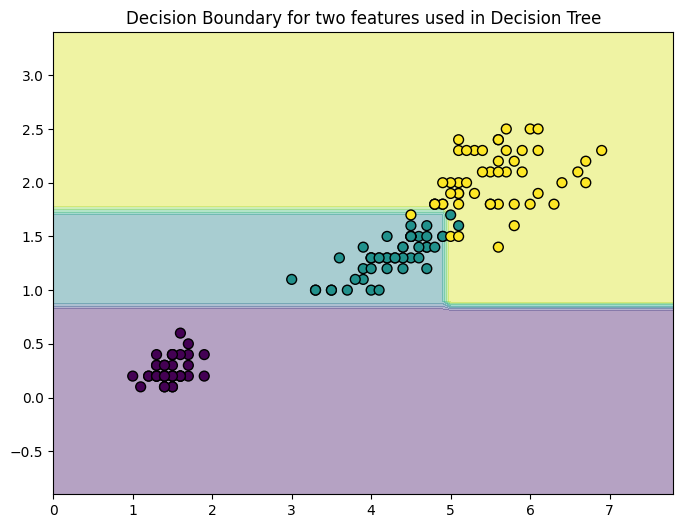

In [7]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

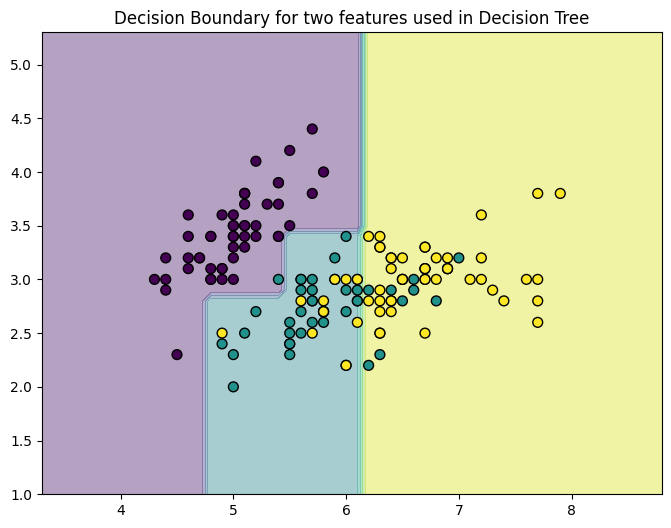

In [8]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

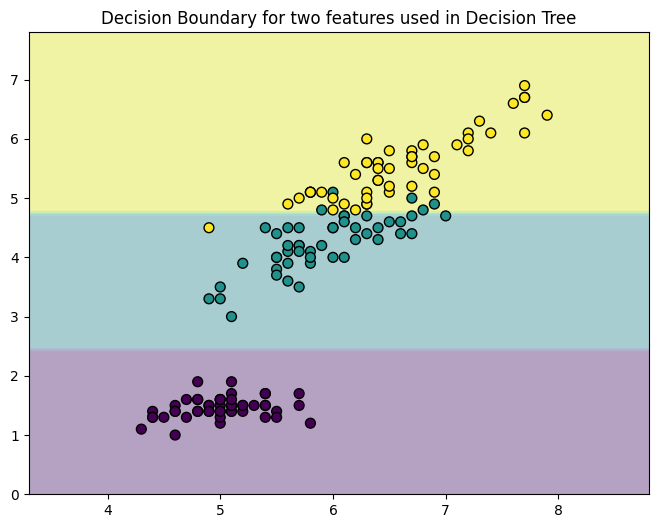

In [9]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

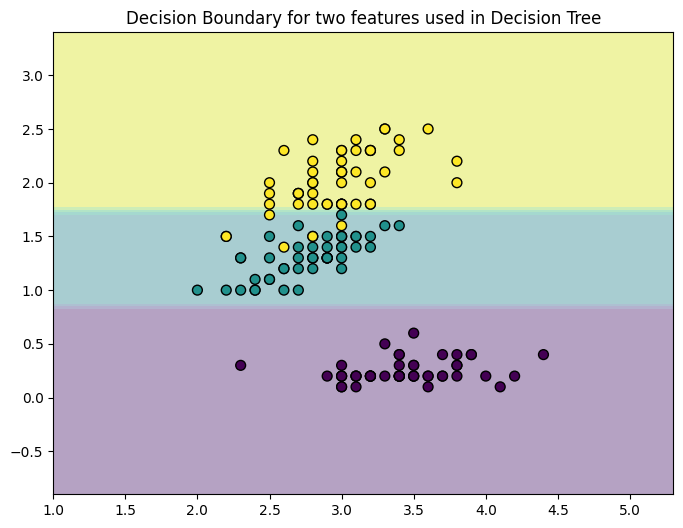

In [10]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

Comparison of Decision Boundaries and Accuracies for Different Max Depth Values
To compare the decision boundaries and accuracies for different values of max_depth, we need to visualize the decision boundary for each value and compute the accuracy of the model.

### Max Depth 2: This tree will have a very limited capacity to capture complex patterns in the data. It may over-simplify the decision boundaries and underfit the model.

##Max Depth 5: This tree will have a bit more complexity, and the decision boundary will likely be more flexible than the one for max_depth=2. It will capture more patterns but may still be prone to underfitting if not sufficient.
 Max Depth 8: This tree will capture more intricate patterns and may create more complex decision boundaries. It will have a higher accuracy, but there is also a higher risk of overfitting.


Max Depth 10: This tree will have the most flexible decision boundary, potentially overfitting the data. It may have very fine details in the decision boundary, but this could result in poor generalization to new data.
For accuracies, typically, as the tree becomes deeper, the accuracy on the training data will increase (because the model becomes more flexible and can fit more complex patterns). However, the accuracy on test data may improve initially and then degrade as the model overfits.

We can visualize these changes by plotting the decision boundaries for different depths and calculating the test accuracy at each depth.

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

Reason Behind Right-Angle Decision Boundaries
The decision boundaries of a decision tree model are always aligned with the axis because the decision at each node is based on a single feature. A decision tree makes decisions by comparing feature values at each node, and since each comparison happens along one of the axes, the decision boundaries are always parallel to these axes.

At any node, the tree splits the data into two parts based on the value of one feature. This leads to boundaries that are perpendicular to the axis corresponding to that feature. Because the tree doesn't use combinations of multiple features in a single split (like in a logistic regression or support vector machine), the boundaries will be orthogonal (right angles) to the axes of the features.
---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

In [11]:
#Task 4:
#4.1:
def predict(sepal_width, sepal_length, petal_width, petal_length):
    # Example logic from a decision tree with a max_depth of 3
    if petal_length <= 2.45:
        if petal_width <= 0.75:
            return 'setosa'  # If petal width is <= 0.75, it's setosa
        else:
            return 'versicolor'  # If petal width is > 0.75, it's versicolor
    else:
        if petal_width <= 1.75:
            return 'versicolor'  # If petal width is <= 1.75, it's versicolor
        else:
            return 'virginica'  # Otherwise, it's virginica

In [13]:
#Task 4:
#4.2:
def predict(sepal_width, sepal_length, petal_width, petal_length):
    # Decision tree logic based on depth 3
    if petal_length <= 2.45:
        if petal_width <= 0.75:
            return 'setosa'  # setosa: small petal size, petal width <= 0.75
        else:
            return 'versicolor'  # versicolor: larger petal size, petal width > 0.75
    else:
        if petal_width <= 1.75:
            return 'versicolor'  # versicolor: larger petal size, moderate petal width
        else:
            return 'virginica'  # virginica: very large petal size, petal width > 1.75

In [14]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [15]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

In [16]:
import numpy as np
from collections import Counter
from math import log2

# Task 5: Calculate Entropy of a collection of 10 datapoints

# Let's assume the following class distribution in a dataset of 10 datapoints
# 4 setosa, 3 versicolor, 3 virginica
data = ['setosa', 'setosa', 'setosa', 'setosa',
        'versicolor', 'versicolor', 'versicolor',
        'virginica', 'virginica', 'virginica']

# Function to calculate entropy of a dataset
def calculate_entropy(data):
    class_counts = Counter(data)
    total = len(data)
    entropy = 0
    for count in class_counts.values():
        prob = count / total
        entropy -= prob * log2(prob) if prob > 0 else 0
    return entropy

# Calculate entropy for the given data
entropy = calculate_entropy(data)
print(f"Entropy of the dataset: {entropy:.4f}")


# Task 6.1: Suggest a Decision Node (if, else) Statement

# For example, let's use 'sepal_length' and split the data based on a threshold
# Assuming we have the following 'sepal_length' values for each flower
sepal_lengths = [5.1, 4.9, 4.7, 5.0, 6.1, 5.7, 5.9, 6.3, 6.5, 6.2]
classes = ['setosa', 'setosa', 'setosa', 'setosa',
           'versicolor', 'versicolor', 'versicolor',
           'virginica', 'virginica', 'virginica']

# Let's split by 'sepal_length' <= 5.0
split_threshold = 5.0
group_1 = [cls for sl, cls in zip(sepal_lengths, classes) if sl <= split_threshold]
group_2 = [cls for sl, cls in zip(sepal_lengths, classes) if sl > split_threshold]

print(f"Group 1 (sepal_length <= {split_threshold}): {group_1}")
print(f"Group 2 (sepal_length > {split_threshold}): {group_2}")


# Task 6.2: Compute the Information Gain for the split

# Function to calculate the information gain for a split
def calculate_information_gain(data, split_1, split_2):
    entropy_before = calculate_entropy(data)
    weight_1 = len(split_1) / len(data)
    weight_2 = len(split_2) / len(data)
    entropy_after = (weight_1 * calculate_entropy(split_1)) + (weight_2 * calculate_entropy(split_2))
    information_gain = entropy_before - entropy_after
    return information_gain

# Compute Information Gain for the split
information_gain = calculate_information_gain(classes, group_1, group_2)
print(f"Information Gain for splitting by sepal_length <= {split_threshold}: {information_gain:.4f}")


# Task 6.3: Compare with other possible decision clauses

# Another possible split based on a different feature, e.g., 'sepal_width'
# Let's assume we have the following 'sepal_width' values for each flower
sepal_widths = [3.5, 3.0, 3.2, 3.4, 3.0, 3.3, 3.1, 3.6, 3.8, 3.5]

# Let's try splitting by 'sepal_width' <= 3.2
split_threshold_2 = 3.2
group_1_2 = [cls for sw, cls in zip(sepal_widths, classes) if sw <= split_threshold_2]
group_2_2 = [cls for sw, cls in zip(sepal_widths, classes) if sw > split_threshold_2]

print(f"Group 1 (sepal_width <= {split_threshold_2}): {group_1_2}")
print(f"Group 2 (sepal_width > {split_threshold_2}): {group_2_2}")

# Compute Information Gain for the second split
information_gain_2 = calculate_information_gain(classes, group_1_2, group_2_2)
print(f"Information Gain for splitting by sepal_width <= {split_threshold_2}: {information_gain_2:.4f}")

# Intuition and Conclusion
if information_gain > information_gain_2:
    print("The split by 'sepal_length' provides higher information gain, hence it's better for classification.")
else:
    print("The split by 'sepal_width' provides higher information gain, hence it's better for classification.")

Entropy of the dataset: 1.5710
Group 1 (sepal_length <= 5.0): ['setosa', 'setosa', 'setosa']
Group 2 (sepal_length > 5.0): ['setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica']
Information Gain for splitting by sepal_length <= 5.0: 0.5568
Group 1 (sepal_width <= 3.2): ['setosa', 'setosa', 'versicolor', 'versicolor']
Group 2 (sepal_width > 3.2): ['setosa', 'setosa', 'versicolor', 'virginica', 'virginica', 'virginica']
Information Gain for splitting by sepal_width <= 3.2: 0.2955
The split by 'sepal_length' provides higher information gain, hence it's better for classification.
